<h1 style="text-align: center"> PATTERNS HIDING IN TED TALKS</h1>

<img src="https://www.repricerexpress.com/wp-content/uploads/2015/03/TED-logo.png"/>


Datset from Kaggle namely, 'Ted-talks/data.csv' is selected for performing exploratory data analysis, pivoted on several of its columns to extract interesting truth it contains. However it is to be remembered that all the analysis performed here and the conclusions arrived at are subject to the bias and error made during the data entry in csv <br>and the applicability of the inferences are within the scope and exactness of available dataset.

## Downloading the Dataset

The dataset of interest is chosen as `TEDTALK ` data from `Kaggle`. We start with downloading it through `opendatsets`

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/ashishjangra27/ted-talks' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sowmssss
Your Kaggle Key: ········


100%|██████████| 298k/298k [00:03<00:00, 87.0kB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './ted-talks'

In [5]:
import os
os.listdir(data_dir)

['data.csv']

## Data Preparation and Cleaning

**In this section we attempt to find columns with missing data and inconsistency so that we can know if generalizing statements from this dataset would be appropriate or biased**



_Firstly required modules are imported and the csv is read into dataframe_

In [6]:
import pandas as pd
import numpy as np
import datetime
import calendar

ted_df=pd.read_csv('./ted-talks/data.csv')
ted_df

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [7]:
ted_df.size

32640

In [8]:
ted_df.shape

(5440, 6)

In [9]:
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


_Here we can see that `author` column has a null value. Since only one value is null, instead of imputing, it is decided to better drop that row_

In [10]:
ted_df.drop(ted_df[ted_df['author'].isna()].index,inplace=True)
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5439 non-null   object
 1   author  5439 non-null   object
 2   date    5439 non-null   object
 3   views   5439 non-null   int64 
 4   likes   5439 non-null   int64 
 5   link    5439 non-null   object
dtypes: int64(2), object(4)
memory usage: 297.4+ KB


#### Now let's look at the date column: it's of `object` type. That can be converted to `date` type for easy processing of data later <br> alternatively we carry out the following task

In [11]:
def f(obj):
    m=pd.to_datetime(str(obj),infer_datetime_format=True).month
    return m
def f2(obj):
    y=pd.to_datetime(str(obj),infer_datetime_format=True).year
    return y

teddate_df=ted_df[['date','title']].copy()
teddate_df['month']=teddate_df['date'].apply(f)
teddate_df['year']=teddate_df['date'].apply(f2)

In [12]:
ted_df.drop(columns=['date'],inplace=True)
ted_df=ted_df.merge(teddate_df,on='title')
ted_df

,title,author,views,likes,link,date,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December 2021,12,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February 2022,2,2022
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September 2021,9,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October 2021,10,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October 2021,10,2021
...,...,...,...,...,...,...,...,...
5434,The best stats you've ever seen,Hans Rosling,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...,February 2006,2,2006
5435,Do schools kill creativity?,Sir Ken Robinson,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,February 2006,2,2006
5436,Greening the ghetto,Majora Carter,2900000,88000,https://ted.com/talks/majora_carter_greening_t...,February 2006,2,2006
5437,Simplicity sells,David Pogue,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...,February 2006,2,2006


Now, we have got two extra columns `month` and `year` of integer datatype

In [13]:
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5438
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5439 non-null   object
 1   author  5439 non-null   object
 2   views   5439 non-null   int64 
 3   likes   5439 non-null   int64 
 4   link    5439 non-null   object
 5   date    5439 non-null   object
 6   month   5439 non-null   int64 
 7   year    5439 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 382.4+ KB


In [19]:
# sorted(ted_df['year'].unique())
np.sort(ted_df['year'].unique())

array([1970, 1972, 1983, 1984, 1990, 1991, 1994, 1998, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

We must *note* that the years for which we have the data are not continuous before 2001

## Exploratory Analysis and Visualization

**Let's play around with some charts and plots** 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [51]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Question:** Are monthly views and likes directly proportional?

In [21]:
viewsum=ted_df.groupby('month')[['views']].sum().sort_values(by='views', ascending=False)
viewsum

,views
month,
2,1984575996
3,1375276896
4,1214604196
11,1180802199
6,1164034699
10,965331498
7,864732799
5,658259600
9,606392100


In [22]:
likesum=ted_df.groupby('month')[['likes']].sum().sort_values(by='likes', ascending=False)
likesum

,likes
month,
2,60176856
3,41836175
4,36985230
11,35867373
6,35242674
10,29302963
7,26254756
5,19961849
9,18433456


In [28]:
most_like_view = pd.merge(likesum,viewsum,on="month").sort_index(axis=0)
most_like_view

,likes,views
month,,
1,9196042,302850399
2,60176856,1984575996
3,41836175,1375276896
4,36985230,1214604196
5,19961849,658259600
6,35242674,1164034699
7,26254756,864732799
8,9008649,295820997
9,18433456,606392100


In [34]:
most_like_view.loc[(most_like_view['likes']==most_like_view.max()[0])&(most_like_view['views']==most_like_view.max()[1])]

,likes,views
month,,
2,60176856,1984575996


**OBSERVATION:**
The most viewed and the most liked ted talks are of those that took place in february. The order of above both series are same in terms of month hinting that most viewed ted talks have more possibilities of getting more likes. Let's back up our idea with two line graphs

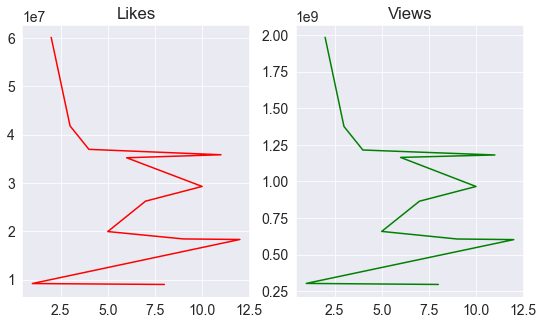

In [50]:
figure, axis = plt.subplots(1, 2)

axis[0].set_title("Likes")
axis[0].plot(likesum,color='red');

axis[1].set_title("Views")
axis[1].plot(viewsum,color='green');


Here we see that both the graphs having more or less the same pattern. Thus, upholding our supposition

**Question** - what are the top 5 years with most cummulative likes and where do they fall when plotted in a bar graph?

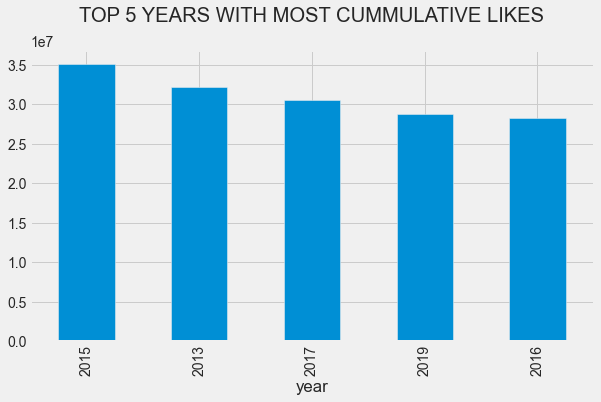

In [66]:
mpl.style.use("fivethirtyeight")
ted_df.groupby('year').likes.sum().sort_values(ascending=False).head(5).plot(kind='bar');
plt.title("TOP 5 YEARS WITH MOST CUMMULATIVE LIKES\n");

In [ ]:
#mpl.style.available


It can be learnt from here that 2015 (3.5e7 likes) is the year with most cummulative likes followed by 2013,2017,2019 and 2016

**QUESTION** - Above graph showed that 2015 has most cummulative likes. what is the distribution of count of shows moth-wise in the year 2015? 

In [69]:
import numpy as np
alis=[]
#ted_df.groupby('year')[['views']].sum().sort_values(by='views', ascending=False).head(5)
for i in range(1,13):
    alis.append(ted_df[(ted_df['year']==2015)&(ted_df['month']==i)].size/ted_df[ted_df['year']==2015].size)
al=np.array(alis)
al

array([0.01861702, 0.01595745, 0.23404255, 0.02925532, 0.11170213,
       0.07712766, 0.01595745, 0.03191489, 0.13297872, 0.11170213,
       0.18085106, 0.03989362])

In [70]:
import calendar
monthindex=[]
for i in range(1,13):
    monthindex.append(calendar.month_name[i])
m_ind=np.array(monthindex)
m_ind

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='<U9')

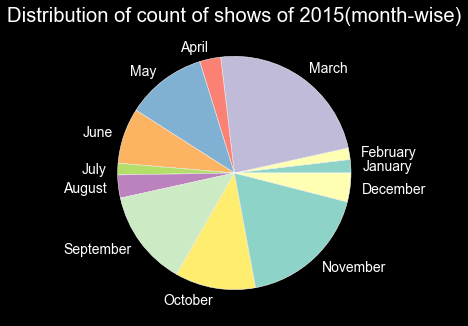

In [71]:
mpl.style.use('dark_background')
plt.pie(al,labels=m_ind)
plt.title("Distribution of count of shows of 2015(month-wise)")
plt.show();

*Observation:* From above pie-chart, we can observe that `March` 2015 having more shows <br>
*REFERENCE:* [https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51]

**Exploring** month-wise likes data with an additional categorical series attached

In [72]:
import seaborn as sns
tedd=ted_df.groupby('month')[['likes']].sum()
tedd['month']=tedd.index
print(tedd['likes'].mean())

28382118.333333332


In [73]:
def lik(l):
    if l>28382118:
        return "Above avg"
    else:
        return "Below avg"

In [74]:
tedd['avg_likes']=tedd['likes'].apply(lik)

        Month vs Likes Joint Plot


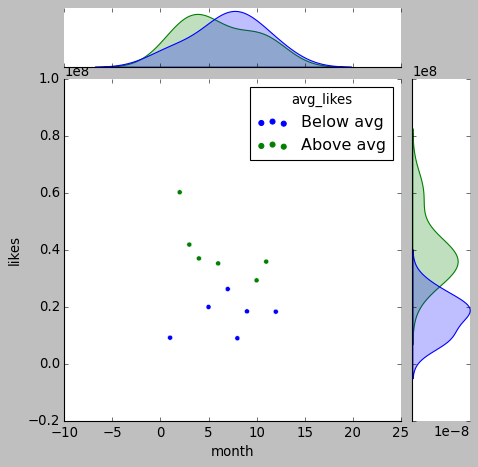

In [77]:
# sns.color_palette("flare", as_cmap=True)
mpl.style.use('classic')
print("        Month vs Likes Joint Plot")
sns.jointplot(data=tedd, x="month", y="likes", hue="avg_likes");

**Trying different visualization** - applying kdeplot (kernel density estimate plot) for the above dataframe `tedd`, we see that rather than using discrete bins,KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate<br> REFERENCE: [https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde]

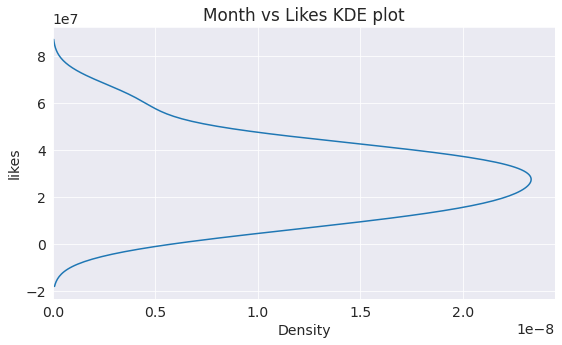

In [73]:
sns.kdeplot(data=tedd, y="likes").set_title("Month vs Likes KDE plot");

*A displot also has the same functionality but provides the solution with discrete bins*<br> _REFERENCE:_ [https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde]

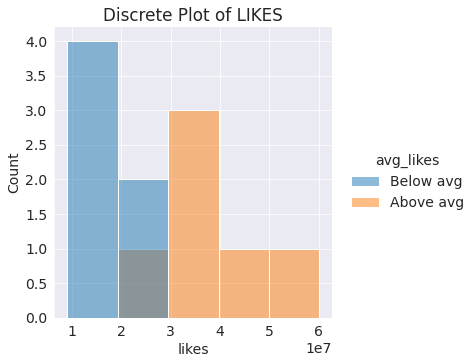

In [75]:
sns.displot(tedd, x="likes", hue="avg_likes").set(title="Discrete Plot of LIKES");

## Asking and Answering Questions

This section tends to answer questions regarding the frequency of speakers- the most frequent author,most one-time likes,etc.,



#### Q1: What are the maximum likes in every year?

In [37]:
ted_df.groupby('year')[['likes']].max().sort_values(by='likes',ascending=False)

,likes
year,
2006,2100000
2012,1900000
2016,1800000
2010,1700000
2009,1700000
2013,1400000
2015,1300000
2011,953000
2017,849000


**OBSERVATION**: We see that the year <u>2006</u> has got the maximum one-time likes

#### Q2: Who is the author with the highest one-time likes and what is the title?

In [39]:
ted_df[(ted_df['year']==2006)&(ted_df['likes']==2100000)].author

5435    Sir Ken Robinson
Name: author, dtype: object

In [40]:
ted_df[(ted_df['year']==2006)&(ted_df['likes']==2100000)].title

5435    Do schools kill creativity?
Name: title, dtype: object

In [41]:
ted_df[(ted_df['year']==2006)&(ted_df['likes']==2100000)]

,title,author,views,likes,link,date,month,year
5435,Do schools kill creativity?,Sir Ken Robinson,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,February 2006,2,2006


**OBSERVATION:** `Sir Ken Robinson` speech on `Do schools kill creativity?` in the month of feb of 2006 has got the highest one-time likes

#### Q3: From cummulative likes Bar Chart above, it was observed that March,2015 got largest sum of likes. Which author(s) has contributed most to that count?

In [53]:
temp=ted_df[(ted_df['year']==2015) & (ted_df['month']==3)]
onetime=temp.groupby('author')[['likes']].max()
onetime=onetime.reset_index()
onetime

,author,likes
0,Rodrigo y Gabriela,90000
1,Abe Davis,45000
2,Alan Eustace,51000
3,Alec Soth and Stacey Baker,72000
4,Alice Goffman,64000
...,...,...
83,Theaster Gates,39000
84,Tony Fadell,104000
85,Trevor Aaronson,40000
86,Yuko Morita,1400


In [54]:
onetime.sort_values(by='likes',ascending=False).head(5)

,author,likes
11,Bill Gates,1300000
60,Monica Lewinsky,617000
32,Esther Perel,575000
9,BJ Miller,442000
37,Greg Gage,387000


**OBSERVATION:** THE FIRST ROW OF THE ABOVE TABLE:

<table><tr><th></th><th>author</th><th>likes</th>
    </tr>
    <tr><td>11</td><td>Bill Gates</td><td>1300000</td></tr>
    </table>
    
   shows that <u>Bill Gates</u> contributed the most to the cummulative likes of 2015 

#### Q4: Who are the top 5 most frequent authors? <br>
*REFERENCE:* [https://pynative.com/pandas-reset-index/#:~:text=df.drop_duplicates()-,Use%20DataFrame.reset_index()%20function,of%20numbers%20starting%20at%200.]

In [80]:
temp2=pd.DataFrame(ted_df['author'].value_counts(normalize=False,sort=True,ascending=False))
temp2=temp2.reset_index()
temp2=temp2.rename({'index':'author','author':'frequency'},axis=1)
print(" 5 Most frequently invited authors\n")
temp2.head(5)

 5 Most frequently invited authors



,author,frequency
0,Alex Gendler,45
1,Iseult Gillespie,33
2,Matt Walker,18
3,Alex Rosenthal,15
4,Elizabeth Cox,13


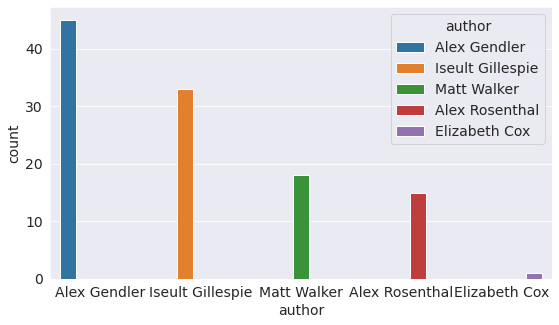

In [108]:
import seaborn as sns
sns.countplot(x="author", hue="author", data=freq[:112]);

**OBSERVATION:** `Alex Gendler` has been invited for 45 times, thus becoming the most frequent ted talk author according to the the given dataset

#### Q5: Which year has the two most frequent authors given many appearances?

In [82]:
temp3=ted_df[['title','author','likes','views','month','year']]
freq=pd.merge(temp2[['author','frequency']],temp3,on='author')
freq

,author,frequency,title,likes,views,month,year
0,Alex Gendler,45,"Blood, concrete, and dynamite: Building the Ho...",21000,724000,12,2021
1,Alex Gendler,45,The woman who stared at the sun,57000,1900000,5,2021
2,Alex Gendler,45,How one design flaw almost toppled a skyscraper,21000,712000,5,2021
3,Alex Gendler,45,"Demolition, disease, and death: Building the P...",21000,724000,4,2021
4,Alex Gendler,45,How the world's tallest skyscraper was built,23000,770000,4,2021
...,...,...,...,...,...,...,...
5434,Nikki Clifton,1,3 ways businesses can fight sex trafficking,47000,1500000,7,2018
5435,Nyle DiMarco,1,Why we need to make education more accessible ...,8800,294000,6,2018
5436,Ben Cort,1,What commercialization is doing to cannabis,76000,2500000,11,2017
5437,Yale Fox,1,Home renters are powerless. Here's how to fix ...,20000,670000,9,2016


In [107]:
alex=freq.head(45)
iseult=freq.iloc[45:78]

In [84]:
yrs=[]
for i in range(2013,2023):
    yrs.append(i)

In [92]:
alex2=[]
alex2=[alex[alex['year']==i].size/7 for i in range(2013,2023)]
alex2

[1.0, 5.0, 4.0, 1.0, 3.0, 4.0, 9.0, 12.0, 6.0, 0.0]

In [93]:
iseult2=[]
iseult2=[iseult[iseult['year']==i].size/7 for i in range(2013,2023)]
iseult2

[0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 13.0, 8.0, 4.0, 3.0]

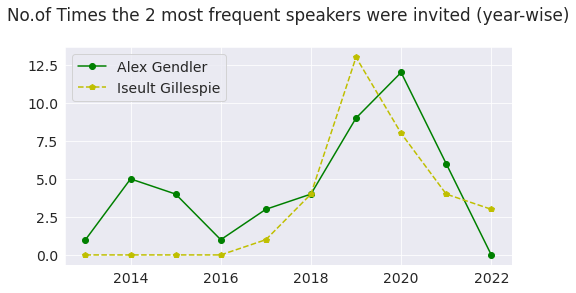

In [89]:
plt.figure(figsize=(8,4));
plt.plot(yrs,alex2, 'o-g')
plt.plot(yrs,iseult2,'p--y')
plt.legend(['Alex Gendler', 'Iseult Gillespie']);
plt.title("No.of Times the 2 most frequent speakers were invited (year-wise)\n");

**OBSERVATION:** `Alex Gendler` has given more number of talks during the year of </u>2020</u><br> whereas `Isuelt Gillespie` has given more number of talks during the year of <u> 2019</u>

#### Q6: Can we add a categorical column classifying the frequencies and visualize based on it? 

In [110]:
def classif(f):
    if f>20:
        return "Above 20"
    elif f>10:
        return "Above 10"
    else:
        return "10 or Below 10"
freq['categories']=freq['frequency'].apply(classif)
freq

,author,frequency,title,likes,views,month,year,categories
0,Alex Gendler,45,"Blood, concrete, and dynamite: Building the Ho...",21000,724000,12,2021,Above 20
1,Alex Gendler,45,The woman who stared at the sun,57000,1900000,5,2021,Above 20
2,Alex Gendler,45,How one design flaw almost toppled a skyscraper,21000,712000,5,2021,Above 20
3,Alex Gendler,45,"Demolition, disease, and death: Building the P...",21000,724000,4,2021,Above 20
4,Alex Gendler,45,How the world's tallest skyscraper was built,23000,770000,4,2021,Above 20
...,...,...,...,...,...,...,...,...
5434,Nikki Clifton,1,3 ways businesses can fight sex trafficking,47000,1500000,7,2018,10 or Below 10
5435,Nyle DiMarco,1,Why we need to make education more accessible ...,8800,294000,6,2018,10 or Below 10
5436,Ben Cort,1,What commercialization is doing to cannabis,76000,2500000,11,2017,10 or Below 10
5437,Yale Fox,1,Home renters are powerless. Here's how to fix ...,20000,670000,9,2016,10 or Below 10


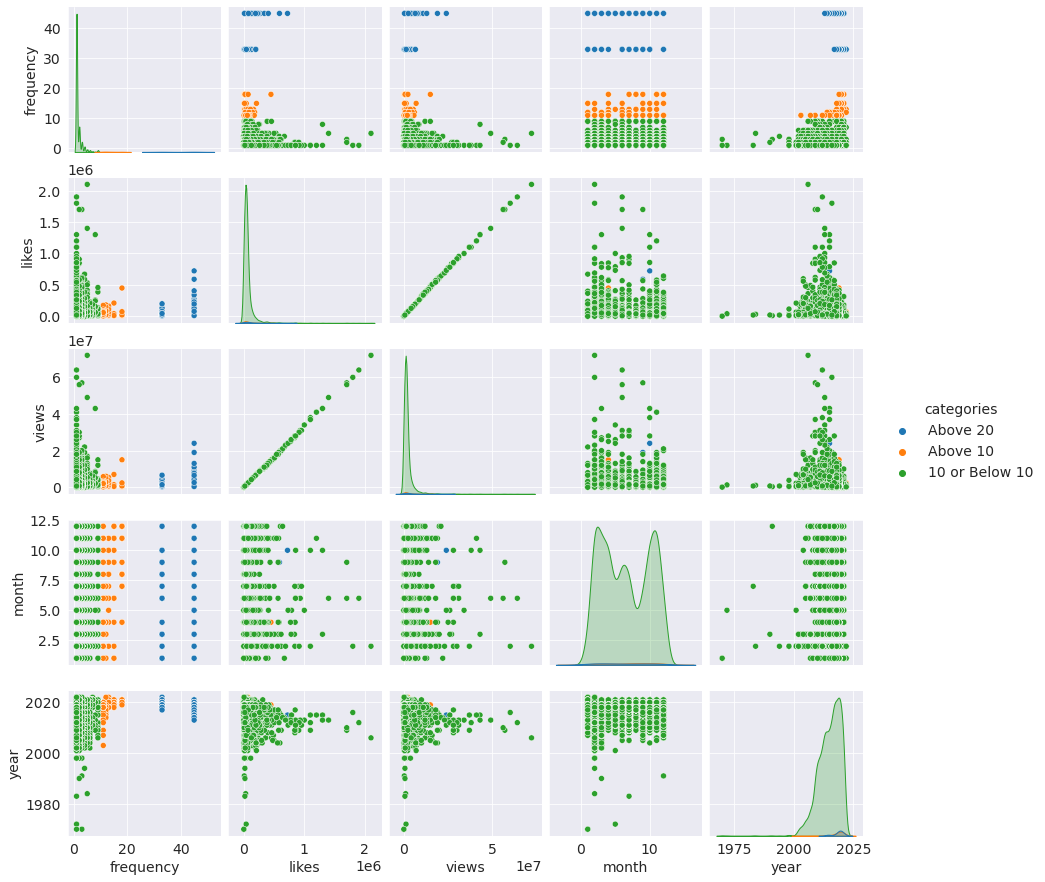

In [111]:
sns.pairplot(freq, hue='categories');

*REFERENCE:* [https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn]

#### Q6: What is the percentage increase of total views after 2000?

In [114]:
ted1=ted_df[ted_df['year']<2000]
sorted(ted1.year.unique())

[1970, 1972, 1983, 1984, 1990, 1991, 1994, 1998]

In [115]:
before=ted1.groupby('year')[['views']].sum().sum()
before

views    12501000
dtype: int64

In [117]:
ted_1=ted_df[ted_df['year']>2000]
after=ted_1.groupby('year')[['views']].sum().sum()
after

views    11202471679
dtype: int64

In [118]:
((after-before)/before)*100

views    89512.604424
dtype: float64

**OBSERVATION:** Thus the percentage increase in ted talk views after the year 2000 is **89512.604424 %**

#### Q7: How many authors have been consistent in giving ted talks with respect to year 2000? i.e., how many authors have given ted talks both before and after the year 2000?

In [119]:
consistent=pd.merge(ted1,ted_1,on='author')
len(consistent.author.unique())

8

**OBSERVATION:** Thus *8* authors have given ted talks both before and after the year 2000

## Inferences and Conclusion

1. Though the data have been inconsistent before the year 2000, it had many details to explore as a whole. The one-time likes and cummulative likes of the ted talks have been analyzed.
2. The author with the most one-time likes has been revealed.
3. The frequency of authors in appearing for the talks had many things to explore, some of which have been analyzed and showcased.
4. The consistency of authors in giving ted talks centered around the year 2000 has been researched yet the skewness and inconsistency of the data is to be taken into account before making any further exploration based on it
5. The relationship between likes and views, cummulative likes vs Year and frequency of authors have all been plotted against respective axes for easy visualization.

## References and Future Work


Further, with this dataset used:<br>The `link/title` column can be taken as a research interest and explored through `nlp` module of python, Finding which keyword is popularly used in ted talk titles<br>The `author` with respect to their field ( through words in `title`) can be explored. `subject/field` can be appended as a categorical column and further analysis regarding which topic/subject got wider audience views/likes/support can be researched.

- [https://stackoverflow.com/questions/60358228/how-to-set-title-on-seaborn-jointplot]
- [https://www.geeksforgeeks.org/how-to-add-a-title-to-seaborn-plots/]
- [https://docs.scipy.org/doc/]
- [https://docs.python.org/3/library/calendar.html#calendar.month_name]
- [https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html#:~:text=Return%20the%20maximum%20of%20the,the%20equivalent%20of%20the%20numpy.]
- [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie]
- [https://www.w3schools.com/python/matplotlib_pie_charts.asp]
- [https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/]

<h4 style="text-align:center">DONE BY: R.SOWMIYA</h4>